In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Amazon Sales data.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [4]:
#Sorting the dataframe on the basis of Order Date

df['Order Date']=pd.to_datetime(df['Order Date'])       # formatting the order date column
df['Ship Date']=pd.to_datetime(df['Ship Date'])       # formatting the ship date column

df.sort_values('Order Date',inplace=True)       # sorting the dataframe by Order Date
df.reset_index(drop=True,inplace=True)       # resetting the index

In [5]:
# Extracting the months, yearly-wise

df['yearly-monthly']=df['Order Date'].dt.to_period('M')
yearly_monthly_sales= df.groupby('yearly-monthly')[['Total Revenue','Total Cost','Total Profit','Units Sold']].sum()
yearly_monthly_sales.reset_index(inplace=True)

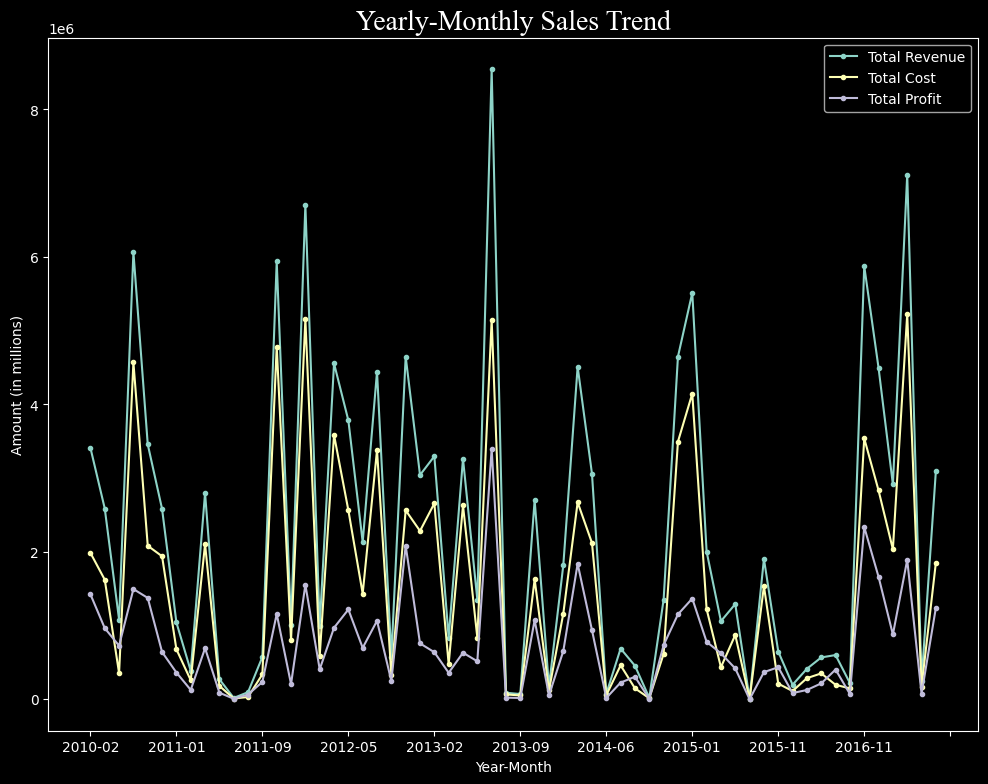

In [6]:
# Plotting line plot to get the trend of yearly-monthly sales

plt.figure(figsize=(12,9))

plt.plot(yearly_monthly_sales['yearly-monthly'].astype(str), yearly_monthly_sales['Total Revenue'], label='Total Revenue', marker='.')
plt.plot(yearly_monthly_sales['yearly-monthly'].astype(str), yearly_monthly_sales['Total Cost'], label='Total Cost', marker='.')
plt.plot(yearly_monthly_sales['yearly-monthly'].astype(str), yearly_monthly_sales['Total Profit'], label='Total Profit', marker='.')

plt.title('Yearly-Monthly Sales Trend', fontdict={'size':20,'family':'times new roman'})
plt.xlabel('Year-Month')
plt.ylabel('Amount (in millions)')

tick_positions = range(0, 61,6)
plt.xticks(tick_positions)

plt.legend()

plt.show()

In [7]:
# Extracting the years

df['years']=df['Order Date'].dt.year.reset_index(drop=True)
yearly_sales=df.groupby('years')[['Total Revenue','Total Cost','Total Profit','Units Sold']].sum()
yearly_sales.reset_index(inplace=True)

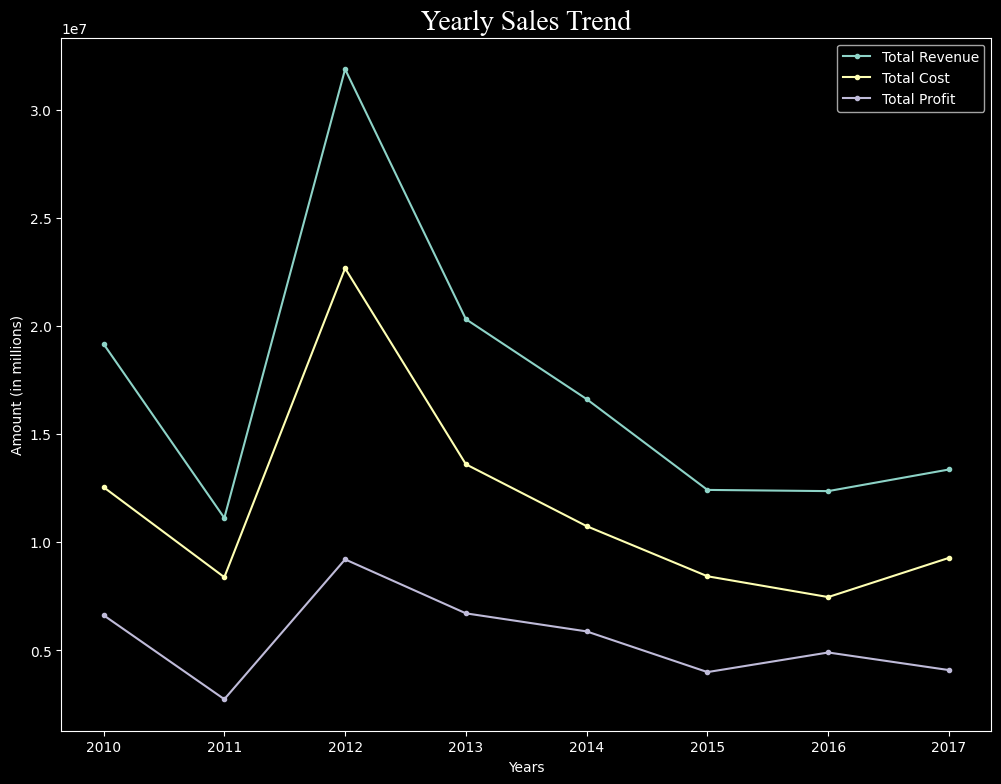

In [8]:
# Plotting line plot to get the trend of yearly sales

plt.figure(figsize=(12,9))

plt.plot(yearly_sales['years'].astype(str), yearly_sales['Total Revenue'], label='Total Revenue', marker='.')
plt.plot(yearly_sales['years'].astype(str), yearly_sales['Total Cost'], label='Total Cost', marker='.')
plt.plot(yearly_sales['years'].astype(str), yearly_sales['Total Profit'], label='Total Profit', marker='.')

plt.title('Yearly Sales Trend', fontdict={'size':20,'family':'times new roman'})
plt.xlabel('Years')
plt.ylabel('Amount (in millions)')

tick_positions = range(0, 8,1)
plt.xticks(tick_positions)

plt.legend()

plt.show()

In [9]:
# Extracting the months

df['months']=df['Order Date'].dt.month.reset_index(drop=True)
monthly_sales=df.groupby('months')[['Total Revenue','Total Cost','Total Profit','Units Sold']].sum()
monthly_sales.reset_index(inplace=True)

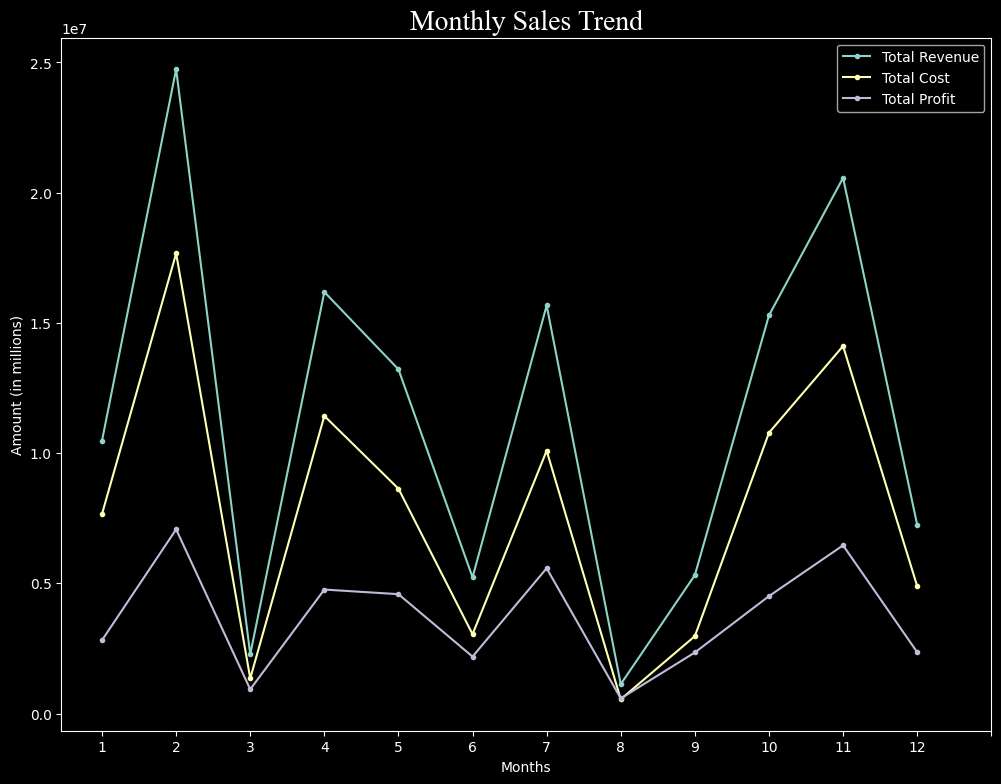

In [10]:
# Plotting line plot to get the trend of monthly sales

plt.figure(figsize=(12,9))

plt.plot(monthly_sales['months'].astype(str), monthly_sales['Total Revenue'], label='Total Revenue', marker='.')
plt.plot(monthly_sales['months'].astype(str), monthly_sales['Total Cost'], label='Total Cost', marker='.')
plt.plot(monthly_sales['months'].astype(str), monthly_sales['Total Profit'], label='Total Profit', marker='.')

plt.title('Monthly Sales Trend', fontdict={'size':20,'family':'times new roman'})
plt.xlabel('Months')
plt.ylabel('Amount (in millions)')

tick_positions = range(0, 13,1)
plt.xticks(tick_positions)

plt.legend()

plt.show()

In [11]:
# Selecting the Columns that only has float or int dtypes based on relevancy

data = df.loc[:, [col for col in df.columns if df[col].dtype in ['int64','float64']]]
data.drop('Order ID',axis=1,inplace=True)

In [12]:
# Getting statistical insights on the data
data.describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


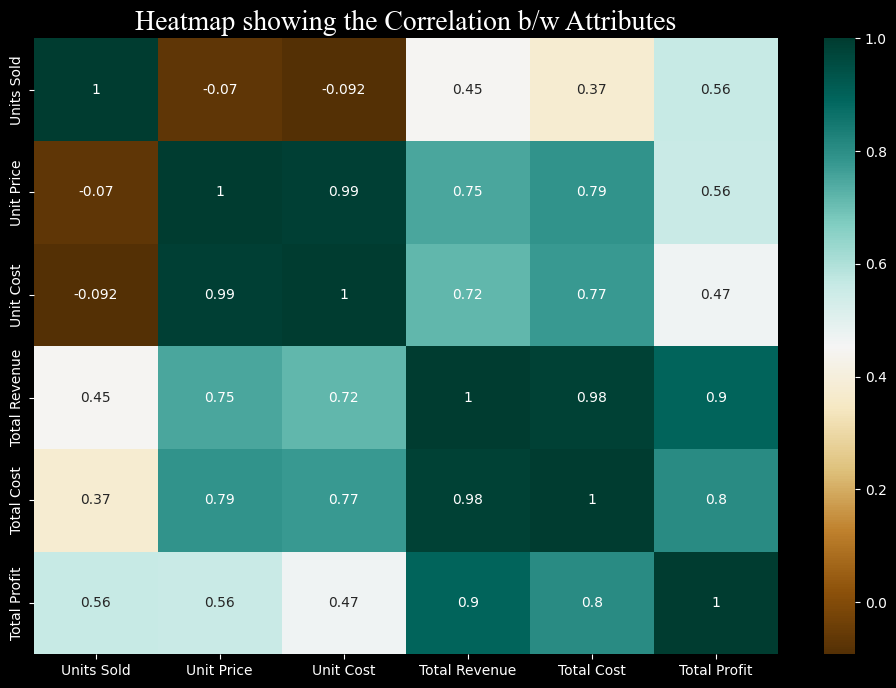

In [13]:
# Plotting a Heatmaps to show the correlation between the attributes

plt.figure(figsize=(12,8))

sns.heatmap(data.corr(),cmap = 'BrBG', annot = True)

plt.title('Heatmap showing the Correlation b/w Attributes', fontdict={'size':20,'family':'times new roman'})
plt.show()